## Maschinelles Lernen SS 2024

### Praktikum 2

Einfache Segmentierung von Bildern


In [1]:
import numpy as np

In [2]:
import cv2 as cv
import glob

In [3]:
import os

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Set path to protein images - Please change the path to the location of images on your system
path = "images/"


In [7]:
# Get all image names
imageNames = []
# Format is ['20_B5_1_green.jpg', ...]
[imageNames.append(filename) for filename in glob.glob(path+"*.jpg")]

[None, None, None, None, None, None, None, None, None, None, None, None]

In [8]:
print(imageNames[0])

images\20_B5_1_green.jpg


In [9]:
# Print all the image names
print(imageNames)

['images\\20_B5_1_green.jpg', 'images\\20_B5_2_green.jpg', 'images\\21_B5_1_green.jpg', 'images\\21_B5_2_green.jpg', 'images\\22_B5_1_green.jpg', 'images\\22_B5_2_green.jpg', 'images\\504_A4_1_green.jpg', 'images\\504_A4_3_green.jpg', 'images\\506_A4_2_green.jpg', 'images\\506_A4_3_green.jpg', 'images\\555_A4_1_green.jpg', 'images\\555_A4_2_green.jpg']


In [10]:
# Create subfolders for images of type A and of type B
os.mkdir(path+'saved_images/')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'images/saved_images/'

In [11]:
os.mkdir(path+'saved_images/A')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'images/saved_images/A'

In [18]:
os.mkdir(path+'saved_images/B')

In [12]:
#For a single image
imageName=imageNames[0]

In [13]:
# Read image
imageProt = cv.imread(imageName)
cv.destroyAllWindows()

In [14]:
imageProt.size

8957952

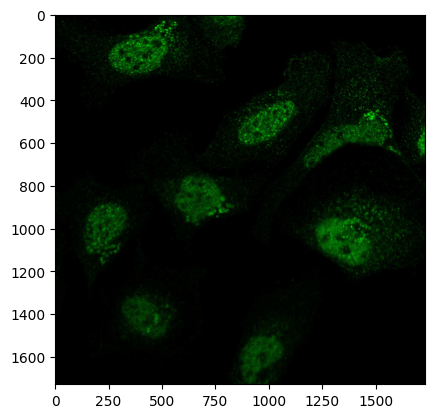

In [15]:
# Show image
plt.imshow(imageProt)

In [16]:
# Convert to grayscale
imageProtGray = cv.cvtColor(imageProt, cv.COLOR_BGR2GRAY)

In [17]:
 # Treshold image to binary
tresholdValue = 1.5 * np.mean(imageProtGray)
ret, grayTresh = cv.threshold(imageProtGray, tresholdValue, 255,
                                  cv.THRESH_BINARY)

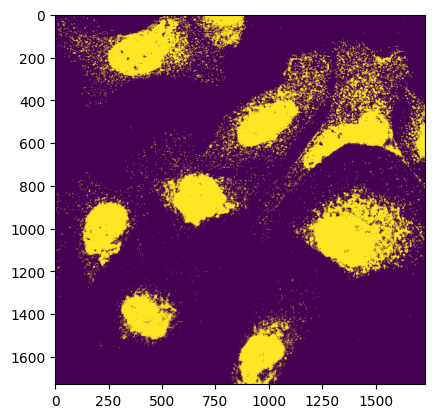

In [18]:
# Show thresholded image
plt.imshow(grayTresh)

In [19]:
cv.imwrite('test.jpg',grayTresh)

True

In [20]:
## Segment image
filterSize = 3
kernel = np.ones((filterSize,filterSize), np.uint8)
# Operate closing to fill holes
grayTreshMorph = grayTresh
grayTreshMorph = cv.morphologyEx(grayTresh,
                                 cv.MORPH_CLOSE, kernel)

# Get contours
contours, hierarchy = cv.findContours(grayTreshMorph,
                                     cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
# Get largest contours
proteinContours = []
# Loop over all contours
for cnt in contours:
    area = cv.contourArea(cnt)
    # Discard small contours
    if area < 10000:
        continue
    # Add contour
    proteinContours.append(cnt)

# Display number of protein contours found
print("Number of protein contours found = " + str(len(proteinContours)))

Number of protein contours found = 10


In [21]:
print(contours[3])

[[[ 826 1714]]

 [[ 829 1714]]]


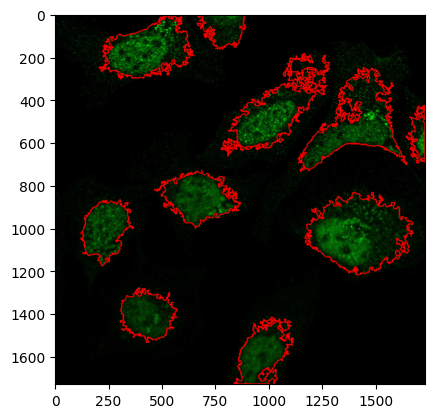

In [22]:
#show image with detected contours
imageWithContours = cv.drawContours(imageProt, proteinContours, -1, (255,0,0), 3)
plt.imshow(imageWithContours)

In [23]:
imageNameFile = imageName.split('/')[-1]

In [24]:
print(imageNameFile)

images\20_B5_1_green.jpg


In [25]:
# Loop over all protein contours to save each protein in 500x500 image
imageProtProteinContours = imageProt.copy()
proteinNr = 0
for c in proteinContours:
    proteinNr += 1
    # Get center of contour
    M = cv.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # Add black border to image
    padding = 250
    # Crop image for each protein found: 500x500x3 jpg
    imageProtPadded = cv.copyMakeBorder(imageProt, padding, padding,
                                        padding, padding,
                                        cv.BORDER_CONSTANT, value=[0, 0, 0])

    # Crop image
    imgSize = 500
    croppedImg = imageProtPadded[cY-int(imgSize/2)+padding:
                                 cY+int(imgSize/2)+padding,
                                 cX-int(imgSize/2)+padding:
                                 cX+int(imgSize/2)+padding]

    # Save cropped protein images
    if imageName[-14] == 'A':
        print('Writing' + path + 'saved_images/A/' +
                   'prot' + str(proteinNr) + '_' +imageNameFile)
        cv.imwrite(path + 'saved_images/A/' +
                   'prot' + str(proteinNr) + '_' + imageNameFile, croppedImg)
    elif imageName[-14] == 'B':
        print(imageNameFile)
        cv.imwrite('Writing' + path + 'saved_images/B/' +
                   'prot' + str(proteinNr) + '_' + imageNameFile, croppedImg)
    else:
        print('Could not determine class for image ', imageNameFile)
        continue



images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images\20_B5_1_green.jpg


In [26]:
for imageName in imageNames:
    print(imageName[-14])

B
B
B
B
B
B
A
A
A
A
A
A


In [27]:
print(path + 'saved_images/B/' +
                    'prot' + "1" + '_' + imageName)

images/saved_images/B/prot1_images\555_A4_2_green.jpg


Image name :images\20_B5_1_green.jpg
Number of protein contours found = 10
images/saved_images/A/prot1_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot2_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot3_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot4_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot5_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot6_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot7_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot8_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot9_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg
images/saved_images/A/prot10_images\20_B5_1_green.jpg
images\20_B5_1_green.jpg


Image name :images\20_B5_2_green.jpg
Number of protein contours found = 12
images/saved_images/A/prot1_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot2_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot3_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot4_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot5_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot6_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot7_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot8_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot9_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot10_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot11_images\20_B5_2_green.jpg
images\20_B5_2_green.jpg
images/saved_images/A/prot12_images\20_B5_2_green.jpg
images\20_B

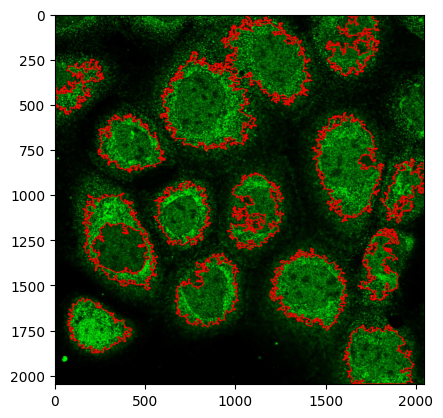

In [28]:
for imageName in imageNames:
  print(f"Image name :{imageName}")
  # Read image
  imageProt = cv.imread(imageName)

  # Show image
  plt.imshow(imageProt)

  # Convert to grayscale
  imageProtGray = cv.cvtColor(imageProt, cv.COLOR_BGR2GRAY)

   # Treshold image to binary
  tresholdValue = 1.5 * np.mean(imageProtGray)
  ret, grayTresh = cv.threshold(imageProtGray, tresholdValue, 255,
                                  cv.THRESH_BINARY)
  ## Segment image
  filterSize = 3
  kernel = np.ones((filterSize,filterSize), np.uint8)
  # Operate closing to fill holes
  grayTreshMorph = grayTresh
  grayTreshMorph = cv.morphologyEx(grayTresh,
                                  cv.MORPH_CLOSE, kernel)

  # Get contours
  contours, hierarchy = cv.findContours(grayTreshMorph,
                                      cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  # Get largest contours
  proteinContours = []
  # Loop over all contours
  for cnt in contours:
      area = cv.contourArea(cnt)
      # Discard small contours
      if area < 10000:
          continue
      # Add contour
      proteinContours.append(cnt)

  # Display number of protein contours found
  print("Number of protein contours found = " + str(len(proteinContours)))

  #show image with detected contours
  imageWithContours = cv.drawContours(imageProt, proteinContours, -1, (255,0,0), 3)
  plt.imshow(imageWithContours)

  imageNameFile = imageName.split('/')[-1]

  # Loop over all protein contours to save each protein in 500x500 image
  imageProtProteinContours = imageProt.copy()
  proteinNr = 0
  for c in proteinContours:
      proteinNr += 1
      # Get center of contour
      M = cv.moments(c)
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])

      # Add black border to image
      padding = 250
      # Crop image for each protein found: 500x500x3 jpg
      imageProtPadded = cv.copyMakeBorder(imageProt, padding, padding,
                                          padding, padding,
                                          cv.BORDER_CONSTANT, value=[0, 0, 0])

      # Crop image
      imgSize = 500
      croppedImg = imageProtPadded[cY-int(imgSize/2)+padding:
                                  cY+int(imgSize/2)+padding,
                                  cX-int(imgSize/2)+padding:
                                  cX+int(imgSize/2)+padding]

      # Save cropped protein images
      if imageName[-14] == 'A':
          print(path + 'saved_images/A/' +
                    'prot' + str(proteinNr) + '_' + imageNameFile)
          cv.imwrite(path + 'saved_images/A/' +
                    'prot' + str(proteinNr) + '_' + imageNameFile, croppedImg)
      elif imageName[-14] == 'B':
          print(path + 'saved_images/A/' +
                    'prot' + str(proteinNr) + '_' + imageNameFile)
          print(imageNameFile)
          cv.imwrite(path + 'saved_images/B/' +
                    'prot' + str(proteinNr) + '_' + imageNameFile, croppedImg)
      else:
          print('Could not determine class for image ', imageNameFile)
          continue